In [1]:
import numpy as np
import sys
sys.path.append("../code/")
from structure import *
from algo import *
from basic import *
from analysis import *
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from autograd.numpy import linalg as LA
import pickle
import itertools
from itertools import product
import calendar
from sklearn.metrics import mean_squared_error
%load_ext autoreload
%autoreload 2
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import matplotlib
matplotlib.rcParams['ps.useafm']=True
matplotlib.rcParams['pdf.use14corefonts']=True
matplotlib.rcParams['text.usetex']=True

In [2]:
year = 2015
dataset = 'artificial'
order = APP_NAME_OBSERVED

In [7]:
# load the selected pairs with the best parameter
sp = {}
param = np.load("../data/best-param-{}-active.npy".format(year)).item()
k, latent_dimension, lambda1, lambda2, lambda3, kernel, delta = param.split("-")
filename = "sp-pre-none-prev_future_weighted-{}-{}-0.1-0.1-0.0-{}-{}-{}-{}-{}".format(kernel, delta, lambda1, lambda2,
                                                                                    lambda3, k, latent_dimension)
directory = "../data/result/reg/update_season/active/{}/{}/".format(year, dataset)
full_path = directory + filename
sp['active'] = np.load(full_path)


param = np.load("../data/best-param-{}-random.npy".format(year)).item()
k, latent_dimension, lambda1, lambda2, lambda3 = param.split("-")
filename = "sp-pre-{}-{}-{}-{}-{}".format(lambda1, lambda2, lambda3, k, latent_dimension)
directory = "../data/result/reg/update_season/random/{}/{}/".format(year, dataset)
full_path = directory + filename
sp['random'] = np.load(full_path)


param = np.load("../data/best-param-{}-qbc.npy".format(year)).item()
k, latent_dimension, lambda1, lambda2, lambda3 = param.split("-")
filename = "sp-pre-{}-{}-{}-{}-{}".format(lambda1, lambda2, lambda3, k, latent_dimension)
directory = "../data/result/reg/update_season/qbc/{}/{}/".format(year, dataset)
full_path = directory + filename
sp['qbc'] = np.load(full_path)


param = np.load("../data/best-param-{}-vb-new.npy".format(year)).item()
k, latent_dimension, a_gamma, b_gamma, a_beta, b_beta, a_alpha, b_alpha, random_seed = param.split("-")
filename = "sp-{}-{}-{}-{}-{}-{}-{}-{}".format(k, latent_dimension, a_gamma, b_gamma, a_beta, b_beta, a_alpha, b_alpha)
directory = "../data/result/vb_var/{}/{}/".format(year, dataset)
full_path = directory + filename
sp['var'] = np.load(full_path)

In [8]:
def calculate_selected_appliance(sp, k, num_random):
    selected_app = np.zeros((12, len(order)))
    for random_seed in range(num_random):
        for fold_num in range(5):
            for t in range(1, 12):
                for i in range(k):
#                     print(random_seed, fold_num, t, i)
                    app_idx = sp[random_seed][fold_num][t][i][1]
                    selected_app[t][app_idx] += 1
    return selected_app

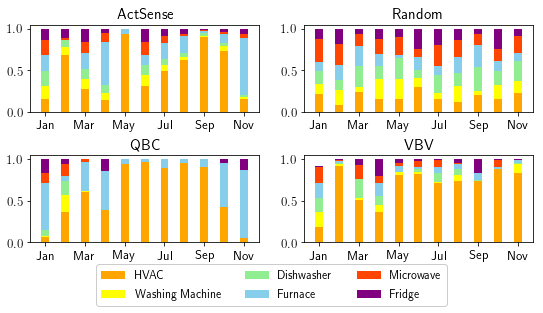

In [20]:
colors = ['gold', 'yellow', 'lightgreen', 'skyblue', 'orangered', 'purple', 'pink']
name_dict = {'active':'ActSense', 'random':'Random', 'qbc':'QBC', 'var':'VBV'}


num_fig = len(sp.keys())
month = ['Jan', 'Mar', 'May', 'Jul', 'Sep',  'Nov']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 4))
ax = axes.flatten()
for n, key in enumerate(['active', 'random', 'qbc', 'var']):
    selected_pairs = calculate_selected_appliance(sp[key], 5, 5)/(5*5*5) + 0.0001

    ind = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
    true_ind = [ 0,  2,  4,   6,   8,  10]
    width=0.4
    p = {}
    p[1] = ax[n].bar(ind, selected_pairs[1:, 1], width, color='orange')
    for t in range(2, 7):
        bottom = 0
        for i in range(1, t):
            bottom += selected_pairs[1:, i]
        p[t] = ax[n].bar(ind, selected_pairs[1:, t], width, bottom=bottom, color=colors[t-1])
    ax[n].set_xticks(true_ind)
    # Set the tick labels
    ax[n].set_xticklabels(month)
    ax[n].set_title(name_dict[key], fontsize=15)
    ax[n].tick_params(labelsize=13)


plt.subplots_adjust(hspace=0.5)
plt.legend((p[1], p[2], p[3], p[4], p[5], p[6]), order[1:], fontsize=12, ncol=3, framealpha=1,
           fancybox=True, bbox_to_anchor=(0.65, -0.8), loc='lower right')
fig.savefig("../figure/selected_pairs.pdf",format='pdf', bbox_inches='tight')

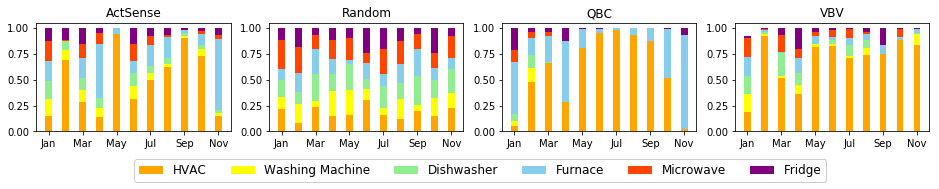

In [11]:
colors = ['gold', 'yellow', 'lightgreen', 'skyblue', 'orangered', 'purple', 'pink']
name_dict = {'qbc':'QBC', 'active':'ActSense', 'random':'Random', 'var':'VBV'}


num_fig = len(sp.keys())
month = ['Jan', 'Mar', 'May', 'Jul', 'Sep',  'Nov']
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16, 2))
ax = axes.flatten()
for n, key in enumerate(sp.keys()):
    selected_pairs = calculate_selected_appliance(sp[key], 5, 5)/(5*5*5) + 0.0001

    ind = [ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]
    true_ind = [ 0,  2,  4,   6,   8,  10]
    width=0.4
    p = {}
    p[1] = ax[n].bar(ind, selected_pairs[1:, 1], width, color='orange')
    for t in range(2, 7):
        bottom = 0
        for i in range(1, t):
            bottom += selected_pairs[1:, i]
        p[t] = ax[n].bar(ind, selected_pairs[1:, t], width, bottom=bottom, color=colors[t-1])
    ax[n].set_xticks(true_ind)
    # Set the tick labels
    ax[n].set_xticklabels(month)
    ax[n].set_title(name_dict[key])

plt.subplots_adjust(hspace=0.5)
plt.legend((p[1], p[2], p[3], p[4], p[5], p[6]), order[1:], fontsize=12, ncol=6, framealpha=1,
           fancybox=True, bbox_to_anchor=(0.5, -0.2))
fig.savefig("../figure/selected_pairs_one_line.pdf",format='pdf', bbox_inches='tight')